#Árboles de Regresión

In [95]:
import pandas as pd

In [96]:
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/boston/Boston.csv'
data = pd.read_csv(url)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [97]:
data.shape

(506, 14)

* **crim**: per capita crime rate by town.

* **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.

* **indus**: proportion of non-retail business acres per town.

* **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* **nox**: nitrogen oxides concentration (parts per 10 million).

* **rm**: average number of rooms per dwelling.

* **age**: proportion of owner-occupied units built prior to 1940.

* **dis**: weighted mean of distances to five Boston employment centres.

* **rad**: index of accessibility to radial highways.

* **tax**: full-value property-tax rate per $10,000.

* **ptratio**: pupil-teacher ratio by town.

* **black**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* **lstat**: lower status of the population (percent).

* **medv**: median value of owner-occupied homes in $1000s.

In [98]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
regtree = DecisionTreeRegressor(min_samples_split = 30, min_samples_leaf = 10, random_state = 0, max_depth = 5)

In [101]:
regtree.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [102]:
preds = regtree.predict(data[predictors])

In [103]:
data['preds'] = preds

In [104]:
data[['preds', 'medv']]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


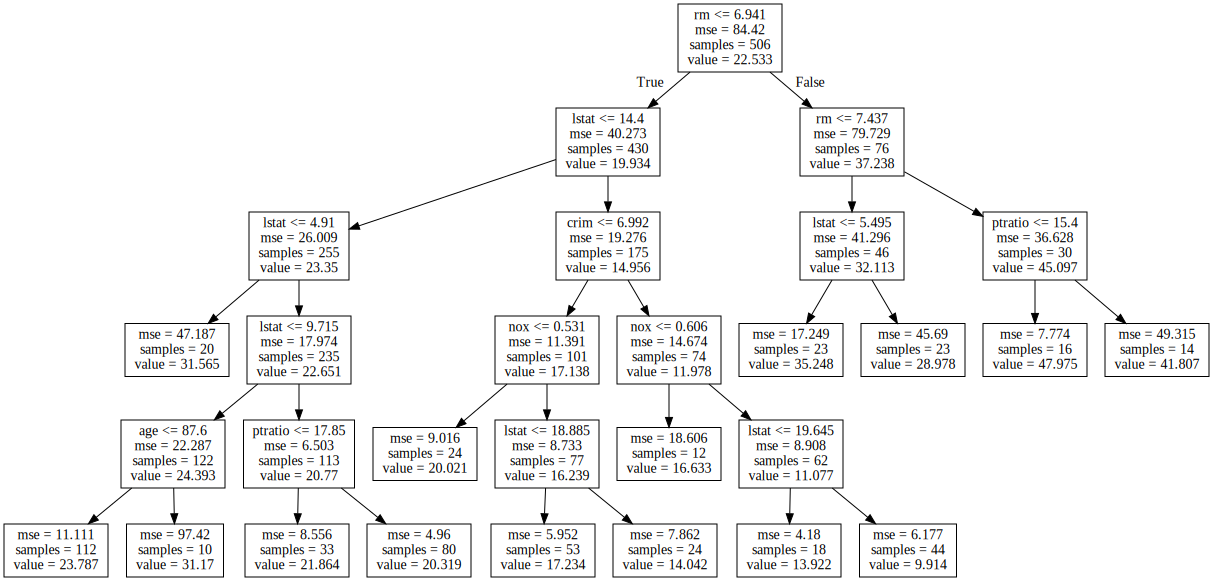

In [105]:
from sklearn.tree import export_graphviz

with open ('/content/regtree.dot', 'w') as dotfile:
  export_graphviz(regtree, out_file = dotfile, feature_names = predictors)
  dotfile.close()

import os 
from graphviz import Source

file = open('/content/regtree.dot', 'r')
text = file.read()
Source(text)

In [106]:
text.replace('\n','')

'digraph Tree {node [shape=box] ;0 [label="rm <= 6.941\\nmse = 84.42\\nsamples = 506\\nvalue = 22.533"] ;1 [label="lstat <= 14.4\\nmse = 40.273\\nsamples = 430\\nvalue = 19.934"] ;0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;2 [label="lstat <= 4.91\\nmse = 26.009\\nsamples = 255\\nvalue = 23.35"] ;1 -> 2 ;3 [label="mse = 47.187\\nsamples = 20\\nvalue = 31.565"] ;2 -> 3 ;4 [label="lstat <= 9.715\\nmse = 17.974\\nsamples = 235\\nvalue = 22.651"] ;2 -> 4 ;5 [label="age <= 87.6\\nmse = 22.287\\nsamples = 122\\nvalue = 24.393"] ;4 -> 5 ;6 [label="mse = 11.111\\nsamples = 112\\nvalue = 23.787"] ;5 -> 6 ;7 [label="mse = 97.42\\nsamples = 10\\nvalue = 31.17"] ;5 -> 7 ;8 [label="ptratio <= 17.85\\nmse = 6.503\\nsamples = 113\\nvalue = 20.77"] ;4 -> 8 ;9 [label="mse = 8.556\\nsamples = 33\\nvalue = 21.864"] ;8 -> 9 ;10 [label="mse = 4.96\\nsamples = 80\\nvalue = 20.319"] ;8 -> 10 ;11 [label="crim <= 6.992\\nmse = 19.276\\nsamples = 175\\nvalue = 14.956"] ;1 -> 11 ;12 [label="nox 

In [107]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits = 20, shuffle = True, random_state = 1)
scores = cross_val_score(regtree, X, Y, scoring = 'neg_mean_squared_error', cv = cv, n_jobs = 1)
print(scores)
import numpy as np
score = np.mean(scores)
print(score)

[-14.77590024 -14.29886559 -18.50447577 -13.82955829 -13.03072867
 -23.38911398 -32.23244462 -57.91101331 -12.64150692 -11.6826727
 -23.55429099  -9.2326917   -9.0873979  -20.77379054 -33.72848594
 -39.1961033  -19.65353831 -44.65877678 -15.58437117  -8.26014583]
-21.801293627864403


In [108]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]